# Recommendation System

## Read the dataset files and load them in appropriate data structure 

In [1]:
import pandas as pd
import numpy as np
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df_tags = pd.read_csv('tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [4]:
df_links = pd.read_csv('links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Lets print CDF plot of average ratings given by users. X-axis is value of average ratings, and Y-axis is the cumulative frequency

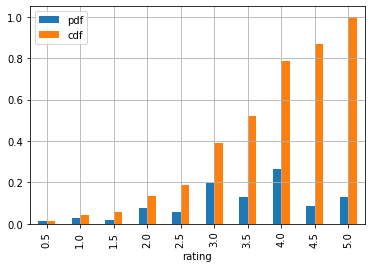

In [5]:
# Get the frequency, PDF and CDF for each value in the series
import matplotlib.pyplot as plt
%matplotlib inline
# Frequency
stats_df = df_ratings.groupby('rating')['rating'].agg('count').pipe(pd.DataFrame).rename(columns = {'rating': 'frequency'})

# PDF (Probability Density Function)
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF (Commulative Density Function)

stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()

stats_df.plot.bar(x = 'rating', y = ['pdf', 'cdf'], grid = True)

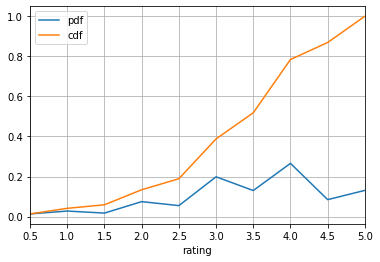

In [6]:
stats_df.plot(x = 'rating', y = ['pdf', 'cdf'], grid = True)

## Arrange users in increasing order of the average ratings they have given. Select a user (X1) at 30 percentile and print the movies and corresponding movies ratings given by X1

In [7]:
grouped_data = df_ratings.groupby('userId')['rating'].mean().sort_values(ascending=True)
#print ("Users grouped and sorted avg rating : ", grouped_data)
percentle_data = grouped_data.quantile(0.3) # 30th percentile
#print (type(percentle_data))
print ("30th Percentile data" , percentle_data)
print (grouped_data.loc[(grouped_data > 3.4170) & (grouped_data < 3.4190)])



30th Percentile data 3.417892365761597
userId
34     3.418605
334    3.418831
473    3.418919
359    3.418919
Name: rating, dtype: float64


In [8]:
print ("Selecting User with closest 30th Percentile Data : 34")

Selecting User with closest 30th Percentile Data : 34


# print the movies and corresponding movies ratings given by user ID :  34

In [9]:
#Lets merge two data frames and get the list of movies and ratings for user ID 34
merged_set = pd.merge(df_ratings,
                 df_movies[['movieId', 'title']],
                 on='movieId')
print("List of Movies and corresponding Movies ratings given by user ID: 34")
rslt_df = merged_set[merged_set['userId'] == 34] 
print (rslt_df[['title','rating']])


List of Movies and corresponding Movies ratings given by user ID: 34
                                                   title  rating
779                           From Dusk Till Dawn (1996)     3.5
865                                    Braveheart (1995)     0.5
1149                                    Desperado (1995)     3.0
2446                                 Forrest Gump (1994)     4.0
5352                Independence Day (a.k.a. ID4) (1996)     3.0
...                                                  ...     ...
75295                                      Taxi 2 (2000)     4.5
75299  Ghost in the Shell 2: Innocence (a.k.a. Innoce...     3.0
75302         Ong-Bak: The Thai Warrior (Ong Bak) (2003)     5.0
75314                     Appleseed (Appurushîdo) (2004)     3.0
75317                                  Hard Candy (2005)     4.5

[86 rows x 2 columns]


## Find top-5 users "similar" to this user (X1) based on movie ratings.

In [10]:
#Get the Mean Rating for all Users 
Mean = df_ratings.groupby(by="userId",as_index=False)['rating'].mean()

#print(Mean)
#Create another table with Mean rating as separate column
Rating_avg = pd.merge(df_ratings,Mean,on='userId')

#print(Rating_avg.head()) #rating_x would be the given rating, rating_y would be the mean rating from that user

#Normalize the rating by subratrating the avg mean rting from the given rating
#Create the new column with name Adjusted rating adg_rating and lets use this for further consideration
Rating_avg['adg_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']

Rating_avg.head()

,userId,movieId,rating_x,timestamp,rating_y,adg_rating
0,1,1,4.0,964982703,4.366379,-0.366379
1,1,3,4.0,964981247,4.366379,-0.366379
2,1,6,4.0,964982224,4.366379,-0.366379
3,1,47,5.0,964983815,4.366379,0.633621
4,1,50,5.0,964982931,4.366379,0.633621


In [11]:
#Create a spreadsheet-style pivot table as a DataFrame for User ID and Movie ID
check = pd.pivot_table(Rating_avg,values='rating_x',index='userId',columns='movieId')
check.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Create a spreadsheet-style pivot table as a DataFrame for User ID and Adjuested Rating
final = pd.pivot_table(Rating_avg,values='adg_rating',index='userId',columns='movieId')
final.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,NaN,-0.366379,NaN,NaN,-0.366379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#We could see lot of NaN values in above dataset because every user has not seen all the moviews 
#and did not give ratings for all the moviews. 
#Hence we need to address this Sparse Matrix issue.

# Replacing NaN by Movie Average
final_movie = final.fillna(final.mean(axis=0))

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [14]:
final_movie.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,-0.053158,-0.366379,-1.096045,-0.522626,-0.366379,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
2,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
3,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
4,0.312167,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024
5,0.363636,-0.053158,-0.234798,-1.096045,-0.522626,0.378461,-0.400728,-0.625024,-0.455446,-0.056326,...,-0.205224,-0.705224,0.294776,0.294776,-0.205224,0.294776,-0.205224,-0.205224,-0.205224,0.372024


In [15]:
final_user.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-3.663793e-01,1.837611e-16,-3.663793e-01,1.837611e-16,1.837611e-16,-3.663793e-01,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,...,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16
2,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,...,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16
3,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,...,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16,3.643809e-16
4,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,...,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16,1.973730e-16
5,3.636364e-01,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,...,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16,1.009294e-16


# Criteria to Compute the Similarity 

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

#Using Cosine Similarity on final user list 
cosine = cosine_similarity(final_user)

#Addressing diagonal values as 0 as both values would be same diagonally 
np.fill_diagonal(cosine, 0 )

#Creating a data frame for similiarity between users based on cosine similarity 
df_user_similarity = pd.DataFrame(cosine,index=final_user.index)

#Setting column names as user index
df_user_similarity.columns=final_user.index

#Get few rows to visualize the similarity matrix
df_user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,0.000000e+00,1.326594e-29,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,1.364803e-29,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-3.908694e-30,-1.559972e-29,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,1.326594e-29,0.000000e+00,-0.011260,-0.031539,0.004800,8.828421e-30,-0.032471,8.140984e-30,1.949298e-30,...,-0.004904,-0.016117,0.017749,-2.149045e-30,-1.430628e-03,-0.037289,-0.007789,-0.013001,9.737646e-30,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,0.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,0.000000,0.009111,1.011715e-02,-0.012284,4.215565e-30,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278


In [17]:
#Using Cosine Similarity on final Movies list 
cosine = cosine_similarity(final_movie)

#Addressing diagonal values as 0 as both values would be same diagonally 
np.fill_diagonal(cosine, 0 )

#Creating a data frame for similiarity between Movies based on cosine similarity 
df_movie_similarity = pd.DataFrame(cosine,index=final_movie.index)

#Setting column names as movie index
df_movie_similarity.columns=final_movie.index

#Get few rows to visualize the similarity matrix
df_movie_similarity.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.988283,0.978406,0.964220,0.986819,0.970456,0.971643,0.987468,0.986382,0.973397,...,0.987335,0.978916,0.917922,0.983978,0.978638,0.959693,0.976120,0.932806,0.989380,0.952774
2,0.988283,0.000000,0.987141,0.971166,0.995793,0.979893,0.981852,0.995168,0.995108,0.981285,...,0.996067,0.988455,0.929086,0.993014,0.988206,0.968868,0.983619,0.940224,0.997957,0.963114
3,0.978406,0.987141,0.000000,0.961237,0.985179,0.970773,0.971932,0.985140,0.985263,0.971464,...,0.986072,0.978562,0.921433,0.983193,0.978363,0.957067,0.974114,0.930653,0.988086,0.954265
4,0.964220,0.971166,0.961237,0.000000,0.968638,0.955187,0.958876,0.970090,0.969158,0.959626,...,0.970625,0.964815,0.903118,0.967106,0.963962,0.942701,0.958891,0.911591,0.972100,0.935866
5,0.986819,0.995793,0.985179,0.968638,0.000000,0.978368,0.980011,0.992905,0.993494,0.979161,...,0.994448,0.986028,0.928126,0.991066,0.986090,0.967230,0.982366,0.938353,0.996584,0.960854


# Find top-5 users "similar" to this user (X1) based on movie ratings

In [18]:
#Function taking similiar user dataset and top N required similar users as input
def find_n_neighbours(df,n):
    #Sort the values for passed input dataframe
    order = np.argsort(df.values, axis=1)[:, :n]
    
    #Return the dataframe in decending order with requited n similar users 
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

# top 5 neighbours for each user
sim_user_top_5 = find_n_neighbours(df_user_similarity,5)
sim_user_top_5.head()

,top1,top2,top3,top4,top5
userId,,,,,
1,301,597,414,477,57
2,189,246,378,209,227
3,441,496,549,231,527
4,75,137,590,391,43
5,145,35,565,134,58


In [19]:
#Find top-5 users "similar" to this user (X1) based on movie ratings
#User X1 = 34 as calculated in the above step
print(sim_user_top_5.loc[[34]])

        top1  top2  top3  top4  top5
userId                              
34        67   192   219   211   301


Above 5 users are matching with the user ID 34

# Lets Recommend top-10 movies to the user (X1) we have selected. 

In [20]:
#Convert movieId type to string 
Rating_avg = Rating_avg.astype({"movieId": str})

#Get the User Ids and respective rated Movie IDs separated by comma (,)
Movie_user = Rating_avg.groupby(by = 'userId')['movieId'].apply(lambda x:','.join(x))

#Define function to call for recommedation for any input user 
def recommedation_to_user(user,topN):
    
    #Validate the user from the available list of users from pivot table check 
    Movie_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    
    #Get the list of similiar users from already available list of top five similar users
    a = sim_user_top_5[sim_user_top_5.index==user].values
    
    #Get the users into the list
    b = a.squeeze().tolist()
    
    #Get the list of users who has also watched same movies as input user 
    d = Movie_user[Movie_user.index.isin(b)]
    
    #Get the list of movies & join them with comma separated 
    l = ','.join(d.values)
    
    #Get the movies list 
    Movie_seen_by_similar_users = l.split(',')
    
    #Remove the list of movies which are already seen by input user 
    #As we do not want to recommend already watched movies to user X1
    Movies_under_consideration = list(set(Movie_seen_by_similar_users)-set(list(map(str, Movie_seen_by_user))))
    Movies_under_consideration = list(map(int, Movies_under_consideration))
    
    #Calculate the score and order the recommended movies in decending order 
    score = []
    for item in Movies_under_consideration: #Take all movies for score calculation 
        #Get the index from df final_movie and validate into shortlisted users in the list 
        c = final_movie.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        
        #Calculate the Avg rating given by the input user. It is to ensure how this user usually rate any movie
        avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
        
        index = f.index.values.squeeze().tolist()
        
        #Get the correlation score for the input user
        corr = df_movie_similarity.loc[user,index]
        
        #Get final score by considering adjacent score and correlation values
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        
        #These numerators and demominator would be the second part of final score
        final_score = avg_user + (nume/deno)
        
        #Append this score into score list to sort later
        score.append(final_score)
    #Arrange the movies and respective score for final consideration
    data = pd.DataFrame({'movieId':Movies_under_consideration,'score':score})
    
    #Sort the dataset based on score in decending order
    top_N_recommendation = data.sort_values(by='score',ascending=False).head(topN)
    
    #Get the movie names
    Movie_Name = top_N_recommendation.merge(df_movies, how='inner', on='movieId')
    Movie_Names = Movie_Name.title.values.tolist()
    
    #Return movie names from the function 
    return Movie_Names


In [21]:
#Calling function recommedation_to_user
#Input : UserID and Top N required recommendation
predicted_movies = recommedation_to_user(34,10)

print(" ")
print("The Top 10 Recommendations for User Id : 34")
print("   ")
for i in predicted_movies:
    print(i)

 
The Top 10 Recommendations for User Id : 34
   
Ten, The (2007)
Yojimbo (1961)
Sanjuro (Tsubaki Sanjûrô) (1962)
Rear Window (1954)
Usual Suspects, The (1995)
Gladiator (2000)
Snatch (2000)
Kiss Kiss Bang Bang (2005)
Star Wars: Episode IV - A New Hope (1977)
Departed, The (2006)
